In [1]:
import pandas as pd;
import numpy as np;
from matplotlib import pyplot as plt;

print("Overview about Batch Gradient Descent , Stochastic Gradient Descent ( SGD ) , Mini Batch Gradient Descent \n");

print("In Batch Gradient Descent, we use all the training samples for one forward pass and then adjust weights\n");

print("In Stochastic Gradient Descent, we use one randamly picked sample for a forward pass and then adjust weights\n");

print("In mini batch gradient Descent, we use a batch of randomly picked samples for a forward pass and then adjust weights\n");

df=pd.read_csv(r'C:\Users\TRISHANKU\Downloads\iris.csv');

df.sample(5)

Overview about Batch Gradient Descent , Stochastic Gradient Descent ( SGD ) , Mini Batch Gradient Descent 

In Batch Gradient Descent, we use all the training samples for one forward pass and then adjust weights

In Stochastic Gradient Descent, we use one randamly picked sample for a forward pass and then adjust weights

In mini batch gradient Descent, we use a batch of randomly picked samples for a forward pass and then adjust weights



,area,bedrooms,price
11,2785,4,140.0
14,2250,3,101.0
13,1100,2,40.0
7,3300,4,155.0
3,1521,3,75.0


In [2]:
print("As we can see the data need to be scaled in preprocessing\n");

#We can make use of preprocessing imported from sklearn

from sklearn import preprocessing;

sx = preprocessing.MinMaxScaler();
sy = preprocessing.MinMaxScaler();

df_X = df.drop( df.columns[2] , axis='columns');

scaler_X = sx.fit_transform(df_X);

df_Y = df[df.columns[2]].values.reshape(scaler_X.shape[0],1);

scaler_Y = sy.fit_transform(df_Y);

#So as far as we can see our scaling is done
print("The scaled input values are :\n",scaler_X);
print("The labeled output values are :\n",scaler_Y);

As we can see the data need to be scaled in preprocessing

The scaled input values are :
 [[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]
The labeled output values are :
 [[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


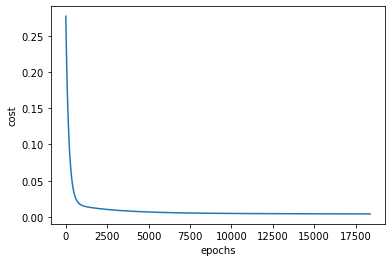

(array([0.66713443, 0.54278347]), -0.14675189534619587)

In [3]:
import math;

def batch_gradient_descent( x , y , epochs , learning_rate = 0.001):
    
    number_of_features = x.shape[1];
    w = np.ones(shape=(number_of_features));
    bias = 0;
    n = x.shape[0];
    
    cost_list = [];
    epoch_list = [];
    cost_prev = 0;
    
    for i in range(epochs):
        
        y_predicted = np.dot( w , x.T ) + bias;
        
        cost = np.mean(np.square(y - y_predicted));
        
        dn = (-2/n)*(x.T.dot(y - y_predicted));
        
        bn = (-2/n)*np.sum( y-y_predicted );
        
        w = w - learning_rate*dn;
        
        bias = bias - learning_rate*bn;
        
        if i%10 ==0:
            cost_list.append(cost);
            epoch_list.append(i);
        
        if math.isclose( cost , cost_prev , rel_tol = 0.00001):
            break;
        
        cost_prev = cost;
    
    plt.plot( epoch_list , cost_list );
    plt.xlabel('epochs');
    plt.ylabel('cost');

    plt.show()
        
    return w,bias;

w , bias = batch_gradient_descent( scaler_X , scaler_Y.reshape(scaler_X.shape[0]) , 100000);
w , bias

In [4]:
def predict( area , bedrooms , w , bias):
    
    scaled_input = sx.transform([[ area , bedrooms ]])[0];
    
    scaled_price = scaled_input[0] * w[0] + scaled_input[1] * w[1] +bias ;
    
    return sy.inverse_transform([[scaled_price]]);
    
predict( 1000 , 2 , w , bias  )

array([[36.71868784]])

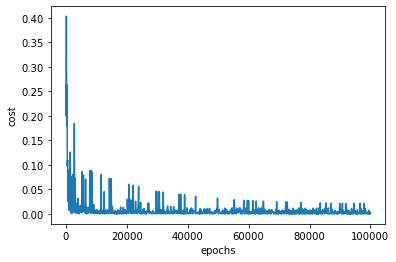

(array([0.67172991, 0.53405024]), -0.14397707934658668)

In [5]:
import math,random;

def stocastic_gradient_descent( x , y , epochs , learning_rate = 0.004):
    
    number_of_features = x.shape[1];
    w = np.ones(shape=(number_of_features));
    bias = 0;
    n = x.shape[0];
    
    cost_list = [];
    epoch_list = [];
    cost_prev = 0;
    
    for i in range(epochs):
        
        randIndex = random.randint(0 , n - 1);
    
        s_x = x[randIndex];
        
        s_y = y[randIndex];
        
        y_predicted = np.dot( w , s_x.T ) + bias;
        
        cost = np.mean(np.square(s_y - y_predicted));
        
        dn = (-2/n)*(s_x.T.dot(s_y - y_predicted));
        
        bn = (-2/n)*np.sum( s_y-y_predicted );
        
        w = w - learning_rate*dn;
        
        bias = bias - learning_rate*bn;
        
        if i%100 ==0:
            cost_list.append(cost);
            epoch_list.append(i);
        
        if math.isclose( cost , cost_prev , rel_tol = 0.00001):
            break;
        
        cost_prev = cost;
    
    plt.plot( epoch_list , cost_list );
    plt.xlabel('epochs');
    plt.ylabel('cost');

    plt.show()
        
    return w,bias;

w_s , bias_s = stocastic_gradient_descent( scaler_X , scaler_Y.reshape(scaler_X.shape[0]) , 100000);
w_s , bias_s

In [6]:
w, bias

(array([0.66713443, 0.54278347]), -0.14675189534619587)

In [7]:
predict(1540,3,w_s,bias_s),predict(1540,3,w,bias),

(array([[71.7514228]]), array([[71.80800919]]))

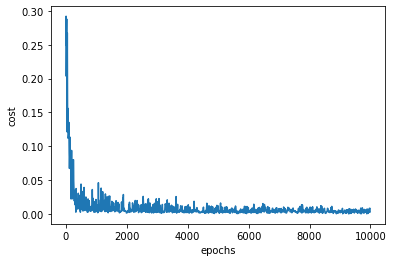

(array([0.66484873, 0.54714871]), -0.14761826617809137)

In [29]:
import math,random;

def mini_batch_gradient_descent( x , y , epochs , batch , learning_rate = 0.007):
    
    number_of_features = x.shape[1];
    w = np.ones(shape=(number_of_features));
    bias = 0;
    n = x.shape[0];
    
    cost_list = [];
    epoch_list = [];
    cost_prev = 0;
    
    for i in range(epochs):
        
        randIndex = np.random.randint(n, size=batch);
        
        s_x=[];
        s_y=[];
        
        for j in randIndex:
            
            s_x.append(x[j]);
            
            s_y.append(y[j]);
            
        s_x = np.array(s_x);
        s_y = np.array(s_y);
        
        y_predicted = np.dot( w , s_x.T ) + bias;
        
        cost = np.mean(np.square(s_y - y_predicted));
        
        dn = (-2/n)*(s_x.T.dot(s_y - y_predicted));
        
        bn = (-2/n)*np.sum( s_y-y_predicted );
        
        w = w - learning_rate*dn;
        
        bias = bias - learning_rate*bn;
        
        if i%10 ==0:
            cost_list.append(cost);
            epoch_list.append(i);
        
        if math.isclose( cost , cost_prev , rel_tol = 0.00001):
            break;
        
        cost_prev = cost;
            
    
    plt.plot( epoch_list , cost_list );
    plt.xlabel('epochs');
    plt.ylabel('cost');

    plt.show()
        
    return w,bias;

w_m , bias_m = mini_batch_gradient_descent( scaler_X , scaler_Y.reshape(scaler_X.shape[0]) , 10000 , 5);
w_m , bias_m

In [30]:
  predict(1000,2,w_s,bias_s),predict(1000,2,w,bias),predict(1000,2,w_m,bias_m)

(array([[36.84132701]]), array([[36.71868784]]), array([[36.72777394]]))